In [299]:
import pandas as pd
import matplotlib.pyplot as plt

In [300]:
 df= pd.read_csv("householdtask3.csv")

In [301]:
 df.head()

,year,tot_hhs,own,own_wm,own_prop,own_wm_prop,prop_hhs,age,size,income,expenditure,eqv_income,eqv_exp
0,2008,1560859,1087580,574406,69.7,36.8,100.0,35.9,2.7,46704,42394,26869,25132
1,2008,185965,71256,39405,38.3,21.2,11.9,29.9,2.6,23404,25270,14258,15824
2,2008,312376,191470,48424,61.3,15.5,20.0,40.0,2.3,16747,21145,13402,14408
3,2008,312333,196203,84171,62.8,26.9,20.0,34.7,2.8,31308,29855,18917,18266
4,2008,312240,217657,141318,69.7,45.3,20.0,31.5,3.0,49106,46561,26870,24672


In [302]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         70 non-null     int64  
 1   tot_hhs      70 non-null     int64  
 2   own          70 non-null     int64  
 3   own_wm       70 non-null     int64  
 4   own_prop     70 non-null     float64
 5   own_wm_prop  70 non-null     float64
 6   prop_hhs     70 non-null     float64
 7   age          70 non-null     float64
 8   size         70 non-null     float64
 9   income       70 non-null     int64  
 10  expenditure  70 non-null     int64  
 11  eqv_income   70 non-null     int64  
 12  eqv_exp      70 non-null     int64  
dtypes: float64(5), int64(8)
memory usage: 7.2 KB


In [303]:
 df.describe()

,year,tot_hhs,own,own_wm,own_prop,own_wm_prop,prop_hhs,age,size,income,expenditure,eqv_income,eqv_exp
count,70.000000,7.000000e+01,7.000000e+01,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,2014.000000,4.125193e+05,2.689711e+05,129639.457143,63.505714,30.348571,24.985714,38.284286,2.625714,56694.785714,49267.128571,33451.500000,29510.471429
std,4.273274,3.491547e+05,2.385230e+05,128627.124758,15.145257,14.010004,21.102368,9.376345,0.350439,28921.315551,24008.560485,16004.914882,13307.606051
min,2008.000000,1.322150e+05,3.008000e+04,14220.000000,22.800000,5.100000,7.800000,27.300000,1.600000,16747.000000,16413.000000,13402.000000,11015.000000
25%,2011.000000,3.123460e+05,1.838408e+05,50636.750000,55.400000,15.850000,20.000000,34.850000,2.500000,33299.000000,29904.750000,21499.500000,19884.500000
50%,2014.000000,3.276340e+05,2.153065e+05,107909.000000,64.200000,32.650000,20.000000,36.600000,2.700000,52429.500000,44887.000000,28454.500000,25763.500000
75%,2017.000000,3.468958e+05,2.604148e+05,147563.000000,73.675000,42.050000,20.000000,38.650000,2.800000,69481.500000,58777.500000,38823.000000,33992.250000
max,2020.000000,1.756740e+06,1.125000e+06,574662.000000,88.100000,58.200000,100.000000,70.300000,3.200000,146672.000000,123424.000000,79607.000000,71985.000000


In [304]:
 df.isnull().sum()

year           0
tot_hhs        0
own            0
own_wm         0
own_prop       0
own_wm_prop    0
prop_hhs       0
age            0
size           0
income         0
expenditure    0
eqv_income     0
eqv_exp        0
dtype: int64

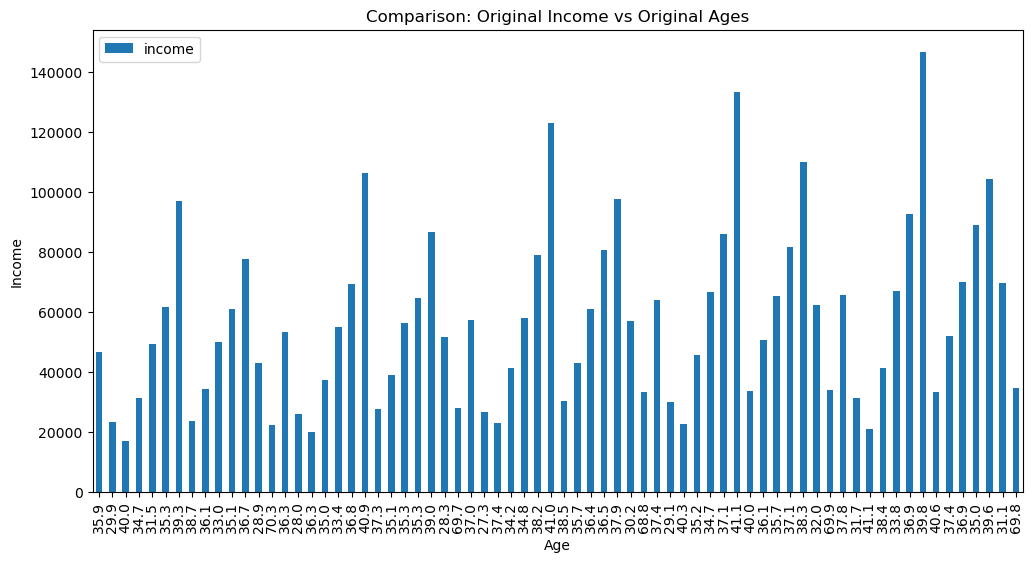

In [305]:
# Plotting the bar chart
df.plot(kind='bar', x='age', y='income', legend=True, figsize=(12, 6))
plt.title('Comparison: Original Income vs Original Ages')
plt.xlabel('Age')
plt.ylabel('Income')
plt.xticks(rotation=90)
plt.show()

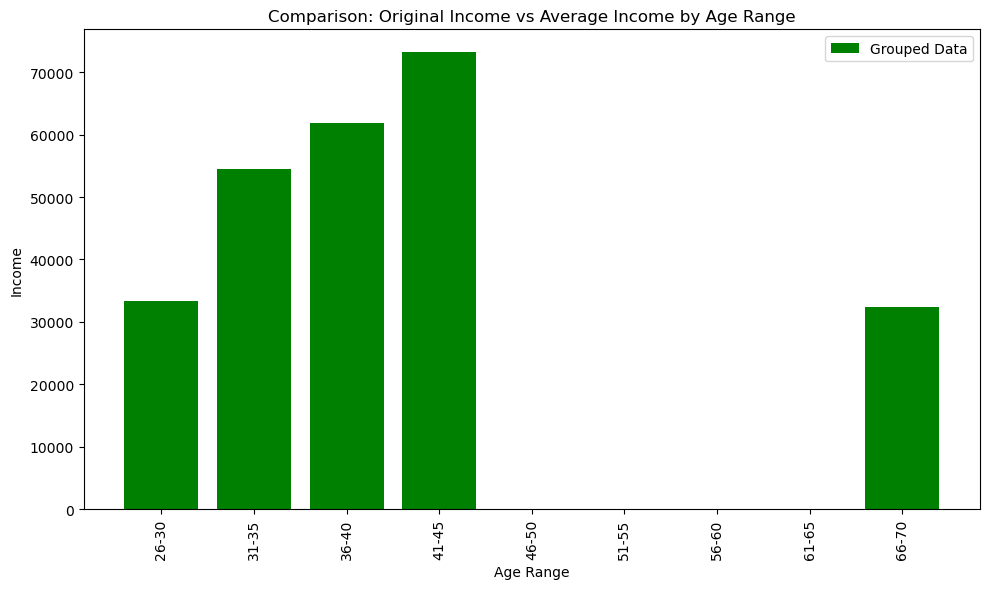

In [306]:
# Define the bins/ranges for ages
age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
age_labels = ['21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70']

# Group ages into ranges using pd.cut()
df['Age Range'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Calculate the mean income for each age range
range_counts = df.groupby('Age Range', observed= False)['income'].mean().sort_index()

# Create a bar chart comparing original and grouped data
plt.figure(figsize=(10, 6))

# Plotting the grouped data as a bar chart
plt.bar(range_counts.index, range_counts.values, color='green', label='Grouped Data')

plt.title('Comparison: Original Income vs Average Income by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Income')
plt.xticks(rotation=90)

plt.legend()
plt.tight_layout()
plt.show()

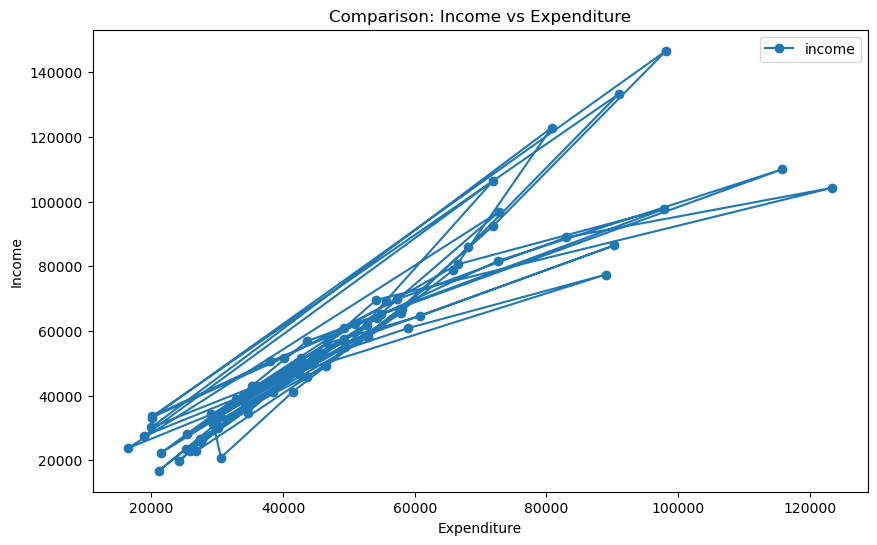

In [307]:
# Plotting the line chart
df.plot(kind='line', x='expenditure', y='income', marker='o', figsize=(10, 6))
plt.title('Comparison: Income vs Expenditure')
plt.xlabel('Expenditure')
plt.ylabel('Income')
plt.show()


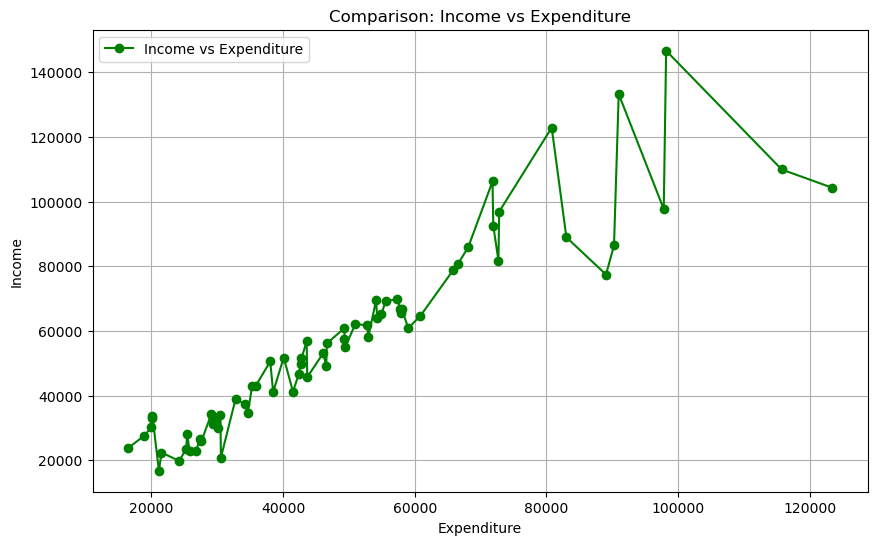

In [308]:
# Sort the DataFrame by expenditure
df = df.sort_values(by='expenditure')

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df['expenditure'], df['income'], marker='o', linestyle='-',color='green', label='Income vs Expenditure')

plt.title('Comparison: Income vs Expenditure')
plt.xlabel('Expenditure')
plt.ylabel('Income')

plt.grid(True)
plt.legend()
plt.show()